In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix , roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [2]:
df_cleaned = pd.read_csv("cleaned_data.csv")
df_cleaned.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Cluster
0,6,148,72,35,0,33.6,0.627,50,1,0
1,1,85,66,29,0,26.6,0.351,31,0,1
2,8,183,64,0,0,23.3,0.672,32,1,0
3,1,89,66,23,94,28.1,0.167,21,0,1
4,5,116,74,0,0,25.6,0.201,30,0,1


In [3]:
X = df_cleaned.drop('Outcome', axis=1)
y = df_cleaned['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler  = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

# - Logistic Regression

In [5]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

y_pred_log  = log_model.predict(X_test)
y_proba_log = log_model.predict_proba(X_test)[:, 1]

In [6]:
print(f"Accuracy: {accuracy_score(y_test, y_pred_log):.4f}")

Accuracy: 0.7344


In [7]:
print(f"ROC-AUC: {roc_auc_score(y_test, y_proba_log):.4f}")

ROC-AUC: 0.7585


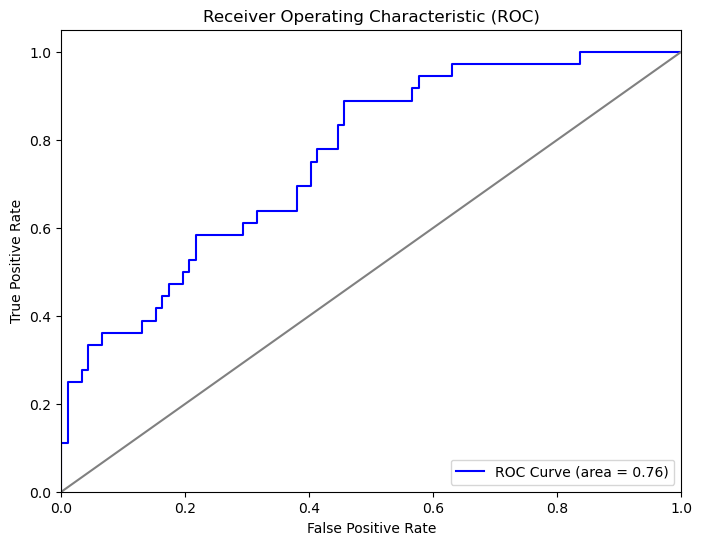

In [8]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba_log)

plt.figure (figsize=(8, 6))
plt.plot   (fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc_score(y_test, y_proba_log):.2f})')
plt.plot   ([0, 1], [0, 1], color='gray', linestyle='-')
plt.xlim   ([0.0, 1.0])
plt.ylim   ([0.0, 1.05])
plt.xlabel ('False Positive Rate')
plt.ylabel ('True Positive Rate')
plt.title  ('Receiver Operating Characteristic (ROC)')
plt.legend (loc='lower right')
plt.show   ()

In [9]:
print("Confusion Matrix : \n" , confusion_matrix(y_test, y_pred_log))

Confusion Matrix : 
 [[81 11]
 [23 13]]


In [10]:
print("Classification Report : \n" , classification_report(y_test, y_pred_log))

Classification Report : 
               precision    recall  f1-score   support

           0       0.78      0.88      0.83        92
           1       0.54      0.36      0.43        36

    accuracy                           0.73       128
   macro avg       0.66      0.62      0.63       128
weighted avg       0.71      0.73      0.72       128



# - KNN

In [12]:
knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train , y_train)
y_pred_knn  = knn.predict(X_test)
y_proba_knn = knn.predict_proba(X_test)[: , 1]

In [13]:
print(f"Accuracy : {accuracy_score( y_test, y_pred_knn ) : .4f}")

Accuracy :  0.7266


In [14]:
print(f"ROC-AUC : {roc_auc_score( y_test, y_proba_knn ) : .4f}")

ROC-AUC :  0.7325


In [15]:
print("Confusion Matrix : \n" , confusion_matrix( y_test, y_pred_knn ))

Confusion Matrix : 
 [[76 16]
 [19 17]]


In [16]:
print("Classification Report:\n" , classification_report( y_test, y_pred_knn ))

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.83      0.81        92
           1       0.52      0.47      0.49        36

    accuracy                           0.73       128
   macro avg       0.66      0.65      0.65       128
weighted avg       0.72      0.73      0.72       128



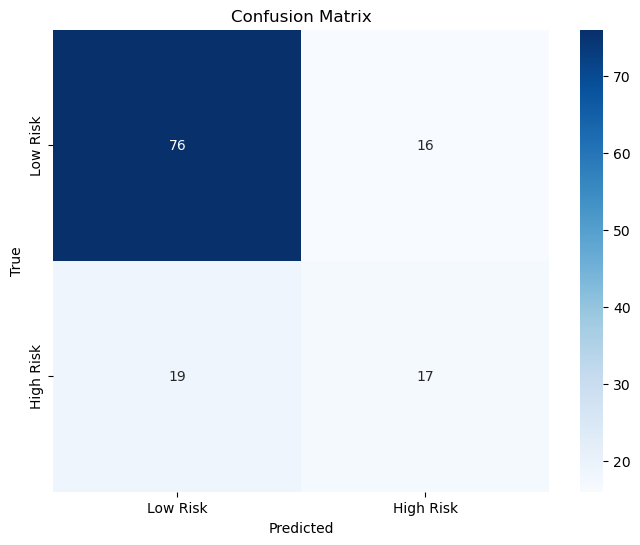

In [17]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix( y_test, y_pred_knn ), annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Low Risk', 'High Risk'], 
            yticklabels=['Low Risk', 'High Risk'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# - DL

In [19]:
NN_model = Sequential()

NN_model.add(Dense(10, activation='relu'))  
NN_model.add(Dense(8, activation='relu'))  
NN_model.add(Dense(1, activation='sigmoid'))

NN_model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

checkpoint_cb     = keras.callbacks.ModelCheckpoint("my_keras_model.keras", save_best_only=True)

early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

In [20]:
history = NN_model.fit( X_train, y_train, 
                        epochs=30, 
                        batch_size=30, 
                        validation_split=0.1,
                        callbacks=[checkpoint_cb, early_stopping_cb ])

Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.6208 - loss: 0.6768 - val_accuracy: 0.7451 - val_loss: 0.6410
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6721 - loss: 0.6638 - val_accuracy: 0.7451 - val_loss: 0.6174
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7050 - loss: 0.6356 - val_accuracy: 0.7451 - val_loss: 0.5971
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7302 - loss: 0.6136 - val_accuracy: 0.7451 - val_loss: 0.5778
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7022 - loss: 0.6117 - val_accuracy: 0.7647 - val_loss: 0.5640
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7054 - loss: 0.5953 - val_accuracy: 0.7647 - val_loss: 0.5501
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6899 - loss: 0.5927 - val_accuracy: 0.7647 - val_loss: 0.5365
Epoch 8/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7357 - loss: 0.5564 - val_accuracy: 0.7647 - val_loss

In [21]:
NN_y_pred      = np.round(NN_model.predict(X_test))
NN_y_proba     = NN_model.predict(X_test).ravel()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [22]:
print(f"Accuracy : { accuracy_score( y_test, NN_y_pred ) :.4f}")

Accuracy : 0.7500


In [23]:
print(f"Accuracy : {roc_auc_score(y_test, NN_y_proba):.4f}")

Accuracy : 0.7823


In [24]:
confusion_matrix( y_test,NN_y_pred )

array([[80, 12],
       [20, 16]], dtype=int64)

In [25]:
print(classification_report( y_test,NN_y_pred ))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83        92
           1       0.57      0.44      0.50        36

    accuracy                           0.75       128
   macro avg       0.69      0.66      0.67       128
weighted avg       0.74      0.75      0.74       128



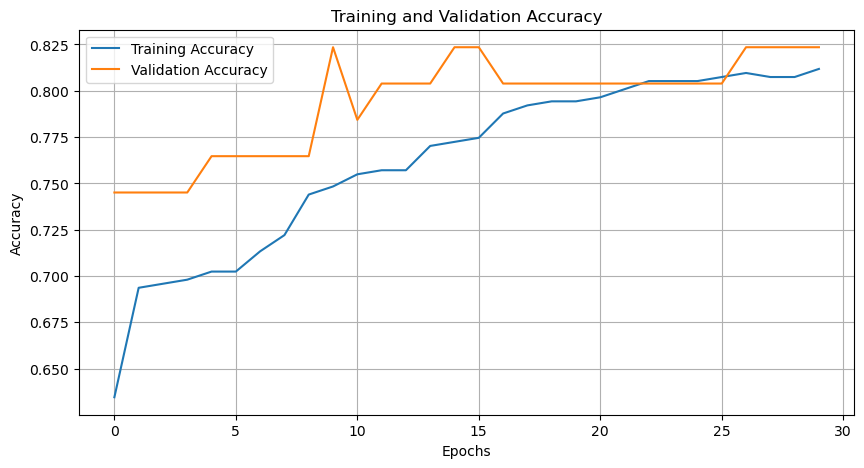

In [26]:
learning_data = pd.DataFrame(history.history)

plt.figure (figsize=(10, 5))
plt.plot   (learning_data['accuracy'], label='Training Accuracy')
plt.plot   (learning_data['val_accuracy'], label='Validation Accuracy')
plt.xlabel ('Epochs')
plt.ylabel ('Accuracy')
plt.title  ('Training and Validation Accuracy')
plt.legend ()
plt.grid   (True)
plt.show   ()

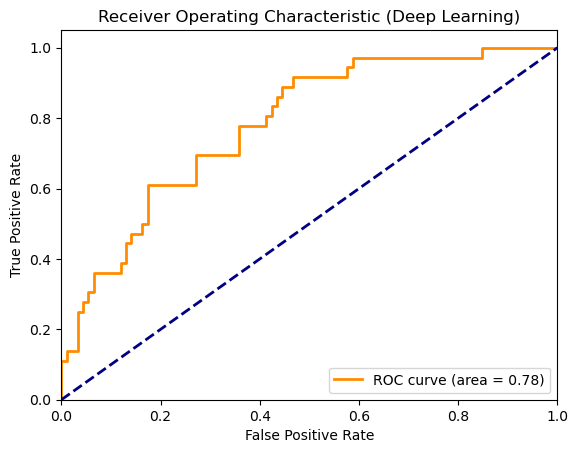

In [27]:
fpr, tpr, thresholds = roc_curve(y_test, NN_y_proba)

plt.figure ()
plt.plot   (fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, NN_y_proba))
plt.plot   ([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim   ([0.0, 1.0])
plt.ylim   ([0.0, 1.05])
plt.xlabel ('False Positive Rate')
plt.ylabel ('True Positive Rate')
plt.title  ('Receiver Operating Characteristic (Deep Learning)')
plt.legend (loc='lower right')
plt.show   ()